# HW4 SSMs

Tony Wang

Coding part

## T1: Pendulum problem

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys


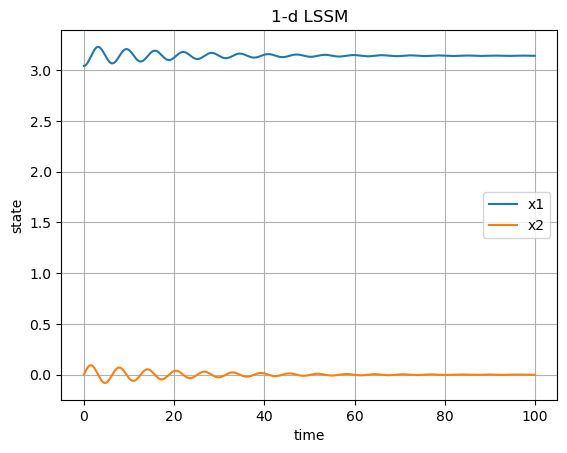

In [27]:
### 1-d LSSM 
num_steps  = 10000
delta_t = 0.01
x1_0 = np.pi - 0.1
x2_0 = 0.0
C = 0.1
# Sinusoidal input
amplitude = 0
frequency = 0.5
# Sinusoidal input over time
u = amplitude *np.sin( frequency *np. arange ( num_steps ) )

x1  = np.zeros(num_steps)
x2 = np.zeros(num_steps)

for i in range(num_steps):
    x1[i] = x1_0 + delta_t * x2_0
    x2[i] = x2_0 + delta_t * (np.sin(x1_0) - C *x2_0 + u[i])
    x1_0 = x1[i]
    x2_0 = x2[i]

# plot the results
plt.figure()
plt.plot(np.arange(num_steps)*delta_t, x1, label='x1')
plt.plot(np.arange(num_steps)*delta_t, x2, label='x2')
plt.title('1-d LSSM')
plt.xlabel('time')
plt.ylabel('state')
plt.legend()
plt.grid()
plt.show()


Part (d)

The plot shows the evolution of the angle \( x_1 \) over time with zero input torque. Initially, the pendulum undergoes damped oscillations due to the friction coefficient \( c = 0.1 \). Over time, these oscillations decay, and the pendulum approaches a stable equilibrium position around \( x_1 = 0 \) (vertical position). This behavior indicates that the system is stable under these conditions and naturally returns to equilibrium due to damping.



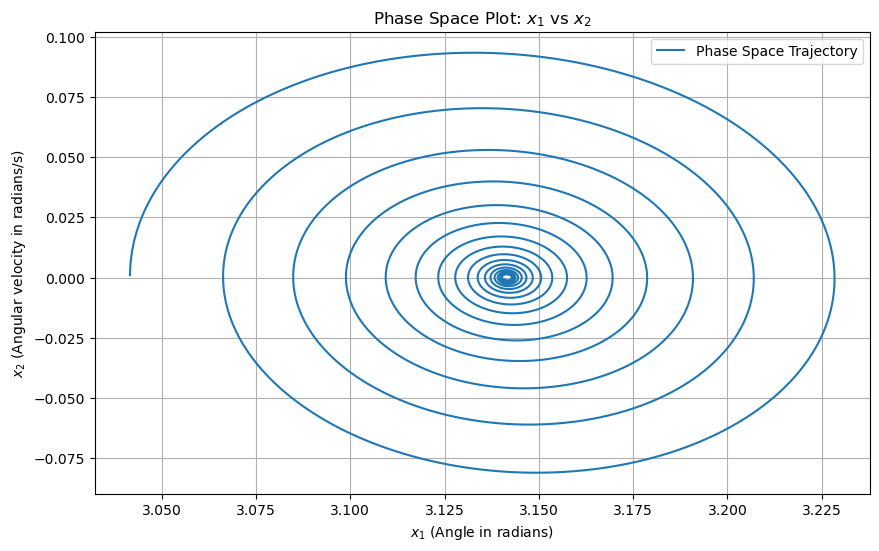

In [28]:
# Phase space plot (x1 vs x2)
plt.figure(figsize=(10, 6))
plt.plot(x1, x2, label='Phase Space Trajectory')
plt.title('Phase Space Plot: $x_1$ vs $x_2$')
plt.xlabel('$x_1$ (Angle in radians)')
plt.ylabel('$x_2$ (Angular velocity in radians/s)')
plt.legend()
plt.grid(True)
plt.show()


Part (e): Phase Space Plot

The phase space plot shows the trajectory of the pendulum in the \( (x_1, x_2) \) space, where \( x_1 \) is the angle and \( x_2 \) is the angular velocity. The spiral inward pattern indicates that the pendulum’s motion is damped. As time progresses, the trajectory spirals toward the origin, where both the angle and angular velocity reach zero, representing the stable equilibrium position. This visualization reaffirms the damping effect in the system, causing it to stabilize

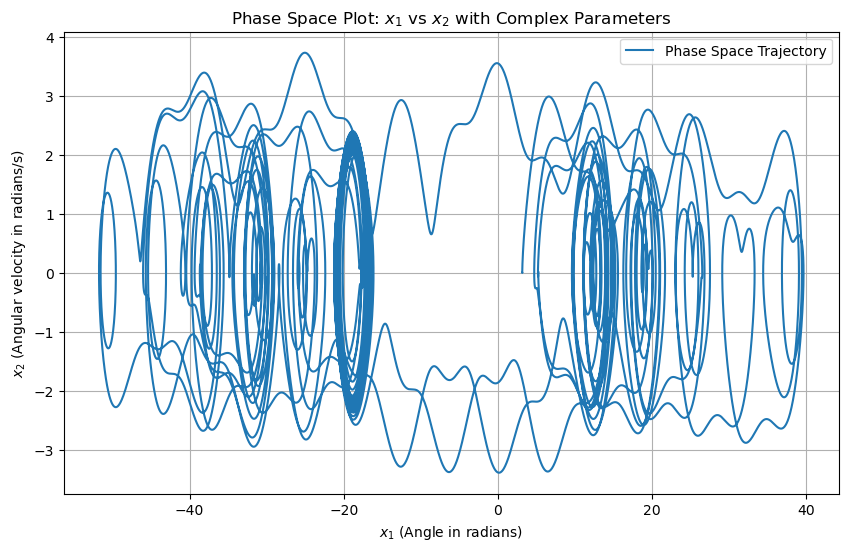

In [29]:
# (f)
delta_t = 0.01
num_steps = 100000
c = 0.01  # Reduced friction coefficient

# Sinusoidal input with specified amplitude and frequency
amplitude = 1
frequency = 0.01
u = amplitude * np.sin(frequency * np.arange(num_steps))

# Initialize arrays to store x1 and x2 with new initial conditions
x1 = np.zeros(num_steps)
x2 = np.zeros(num_steps)
x1[0] = x1_0
x2[0] = x2_0

# Run the simulation for the updated parameters
for k in range(1, num_steps):
    # Apply the discrete-time update equations
    x1[k] = x1[k-1] + delta_t * x2[k-1]
    x2[k] = x2[k-1] + delta_t * (-c * x2[k-1] - np.sin(x1[k-1]) + u[k-1])

# Phase space plot (x1 vs x2) for part (f)
plt.figure(figsize=(10, 6))
plt.plot(x1, x2, label='Phase Space Trajectory')
plt.title('Phase Space Plot: $x_1$ vs $x_2$ with Complex Parameters')
plt.xlabel('$x_1$ (Angle in radians)')
plt.ylabel('$x_2$ (Angular velocity in radians/s)')
plt.legend()
plt.grid(True)
plt.show()


###  (f): Complex Behavior in the Pendulum

With a reduced friction coefficient, larger input amplitude, and a low-frequency sinusoidal input, the phase space plot exhibits irregular and complex trajectories. This suggests that the pendulum no longer settles into a stable equilibrium or periodic oscillation but instead shows potentially chaotic behavior. The pendulum's angle and velocity vary widely, indicating sensitive dependence on initial conditions and the external input.

In physical terms, this behavior could mean that the pendulum, under these conditions, does not stabilize or settle into regular oscillations. Instead, it might exhibit irregular, possibly chaotic oscillations, where it does not return to a predictable path. This demonstrates how certain parameter choices can induce complex dynamics in otherwise stable systems, typical in nonlinear dynamical systems like pendulums with external forcing.

In [30]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([
    [0.5, 0.25, 0.125],
    [1.0, 0.0, 0.0],
    [0.0, 1.0, 0.0]
])
B = np.array([[1], [0], [0]])
C = np.array([1.0, 1.0, 1.0])  # Observation matrix

eigenvalues = np.linalg.eigvals(A)
print("Eigenvalues of A:")
print(eigenvalues)

Eigenvalues of A:
[ 0.91964338+0.j         -0.20982169+0.30314536j -0.20982169-0.30314536j]


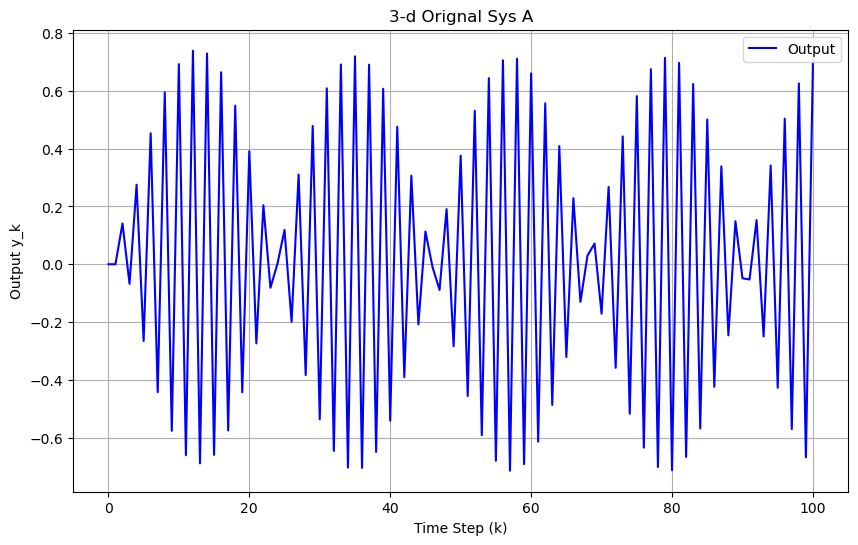

In [31]:
def sys_dynamic_3(A, C, name, num_steps=100, x0=None):
    def u(k):
        return np.sin(3 * k)
    x = np.zeros((A.shape[0], num_steps + 1))
    y = np.zeros(num_steps + 1)
    x[:, 0] = np.zeros(3) if x0 is None else x0

    for k in range(num_steps):
        x[:, k+1] = A @ x[:, k] + np.array([u(k), 0, 0])
        y[k] = C @ x[:, k]
    y[num_steps] = C @ x[:, num_steps]  # Final output
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(num_steps + 1), y, 'b-', label='Output')
    plt.xlabel('Time Step (k)')
    plt.ylabel('Output y_k')
    plt.title(name)
    plt.grid(True)
    plt.legend()
    plt.show()
    
    return x, y

x, y = sys_dynamic_3(A, C, '3-d Orignal Sys A')

In [32]:
import control

def check_sys(A, B, C):
    def print_matrix_info(matrix, name, rank):
        print(f"\n{name} Matrix:")
        print(matrix)
        print(f"Rank: {rank}")
        print(f"Is {name}: {rank == A.shape[0]}")
    #  controllability
    Ac = control.ctrb(A, B)
    rank_Co = np.linalg.matrix_rank(Ac)
    #  observability
    Ao = control.obsv(A, C)
    rank_Ob = np.linalg.matrix_rank(Ao)
    print_matrix_info(Co, "Controllability", rank_Co)
    print_matrix_info(Ob, "Observability", rank_Ob)
    return Ac, Ao

Ac, Ao = check_sys(A, B, C)


Controllability Matrix:
[[1.  0.5 0.5]
 [0.  1.  0.5]
 [0.  0.  1. ]]
Rank: 3
Is Controllability: True

Observability Matrix:
[[1.     1.     1.    ]
 [1.5    1.25   0.125 ]
 [2.     0.5    0.1875]]
Rank: 3
Is Observability: True


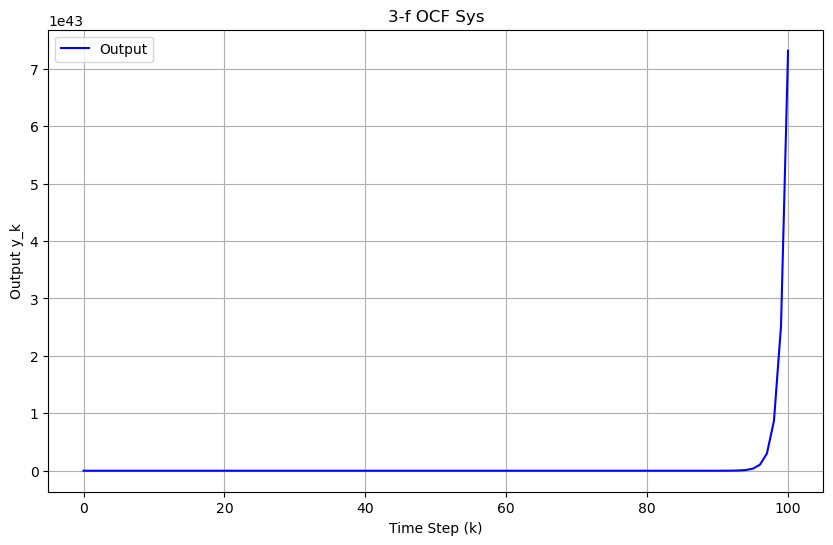

In [35]:
C = np.array([1,0,0])
x,y = sys_dynamic_3(Ao, C, '3-f OCF Sys')

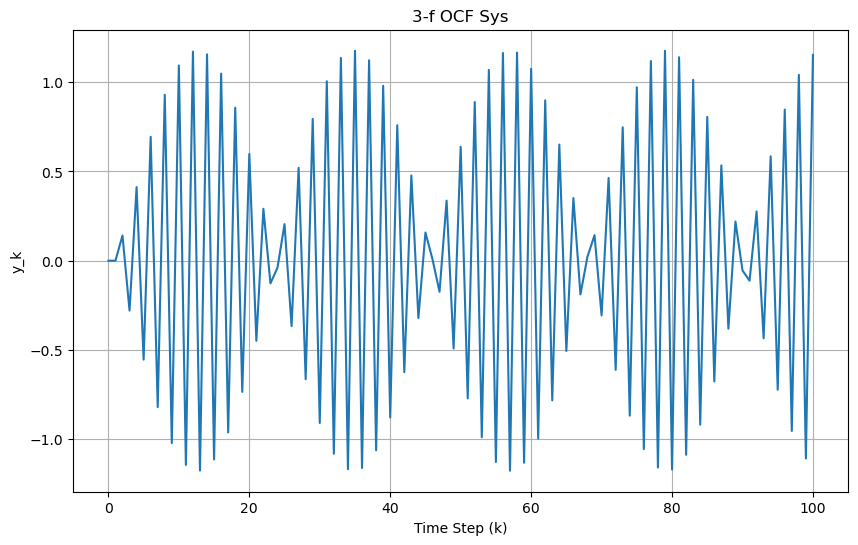

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Observable canonical form matrices
A_o = np.array([
    [0.0, 0.0, -0.125],
    [1.0, 0.0, -0.25],
    [0.0, 1.0, -0.5]
])
b_o = np.array([1.0, 0.0, 0.0])
C_o = np.array([1.0, 0.0, 0.0])

# Initial condition
xi0 = np.zeros(3)

# Time steps
num_steps = 100
xi = np.zeros((3, num_steps + 1))
y_o = np.zeros(num_steps + 1)
xi[:, 0] = xi0

# Input function
def u(k):
    return np.sin(3 * k)

# Simulation loop
for k in range(num_steps):
    xi[:, k+1] = A_o @ xi[:, k] + b_o * u(k)
    y_o[k] = C_o @ xi[:, k]

# Compute the last output
y_o[num_steps] = C_o @ xi[:, num_steps]

# Plotting the output y_k over time
plt.figure(figsize=(10, 6))
plt.plot(range(num_steps + 1), y_o)
plt.xlabel('Time Step (k)')
plt.ylabel('y_k')
plt.title('3-f OCF Sys')
plt.grid(True)
plt.show()
